# Getting started

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

`comparison_metrics` can be best used thorugh the `xarray` accessor. Comparison methods are available for `xarray` `DataArray` objects. We will also need other functionality from the package, so we import it, too:

In [2]:
from comparson_metrics import cmp_xarray
import comparson_metrics as cmp

## Comparing 1D signals

The package comes with tutorial datasets:

In [3]:
s1, s2 = cmp.tutorial.load_dataset('1d_signals')  # returns two xarray Data Array objects
s1

<xarray.DataArray (x: 11)>
array([0.        , 0.29552021, 0.56464247, 0.78332691, 0.93203909,
       0.99749499, 0.97384763, 0.86320937, 0.67546318, 0.42737988,
       0.14112001])
Coordinates:
  * x        (x) float64 0.0 0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3.0
Attributes:
    units:      au
    long_name:  signal 1

Plot data arrays and note, that x data location not always agree and one signal data point is missing and masked with `np.nan`, thus line is not drawn

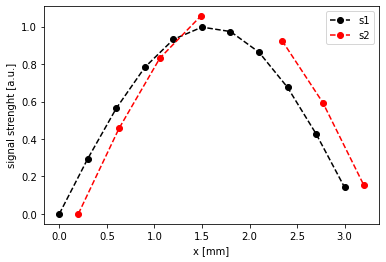

In [4]:
plt.figure()
s1.plot(linestyle='--', marker='o', color='k', label='s1')
s2.plot(linestyle='--', marker='o', color='r', label='s2')
plt.title('')
plt.ylabel('signal strenght [a.u.]')
plt.legend()
plt.show()

## Computing the absolute error

The absolute error or simply the difference between observation and prediction
\begin{equation}
d = s_1-s_2
\end{equation}
between both signals, although x-coordinates are different and a data point is "s2" is missing (`np.nan`), can be computed as follows:

In [5]:
d = s1.cmp.compute_metric(s2, 'AE')
d

<xarray.Dataset>
Dimensions:      (x: 8)
Coordinates:
  * x            (x) float64 0.2 0.6286 1.057 1.486 1.914 2.343 2.771 3.2
Data variables:
    observation  (x) float64 0.197 0.5855 0.8612 0.9944 0.9317 0.7112 0.3592 nan
    prediction   (x) float64 0.0 0.4571 0.8316 1.056 nan 0.9249 0.5937 0.1552
    AE           (x) float64 0.197 0.1283 0.02965 ... -0.2136 -0.2345 nan
Attributes:
    interpolation_direction:  observation onto prediction

The logger statement shows, that the "observation" was interpolated onto the "prediction". "Observation" is **s1** and "prediction" is **s2**. Interpolation is done this way because the number of data points in observation is higher:

In [6]:
d.cmp.interpolation_direction

The information is also stored as `xarray.DataArray` attribute:

In [7]:
d.interpolation_direction

'observation onto prediction'

Visual inspection by plotting both signals and the difference:

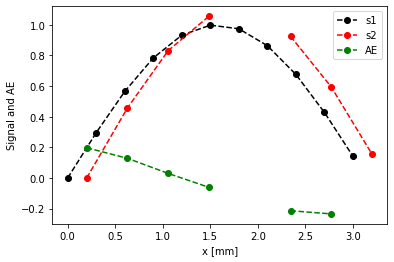

In [8]:
s1.plot(linestyle='--', marker='o', color='k', label='s1')
s2.plot(linestyle='--', marker='o', color='r', label='s2')
d.AE.plot(linestyle='--', marker='o', color='g', label='AE')
plt.ylabel('Signal and AE')
plt.legend()

The accessor has a plotting function, too:

In [9]:
d.cmp._obj.data_vars

Data variables:
    observation  (x) float64 0.197 0.5855 0.8612 0.9944 0.9317 0.7112 0.3592 nan
    prediction   (x) float64 0.0 0.4571 0.8316 1.056 nan 0.9249 0.5937 0.1552
    AE           (x) float64 0.197 0.1283 0.02965 ... -0.2136 -0.2345 nan

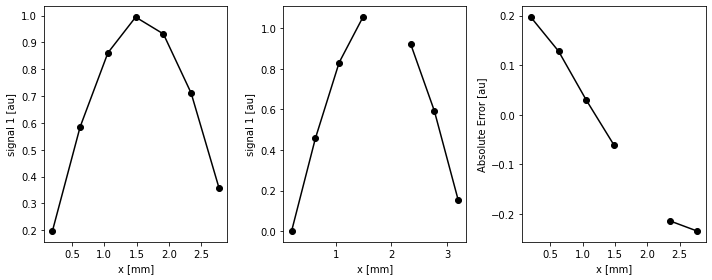

In [10]:
_ = d.cmp.plot(figsize=(10, 4), marker='o', color='k')

## Vortex core (2d velocity field)

In [11]:
ds1 = cmp.tutorial.load_dataset('vortex1')
ds2 = cmp.tutorial.load_dataset('vortex2')

In [12]:
vortex_diff = ds2.u.cmp.compute_metric(ds1.magnitude, 'AE')

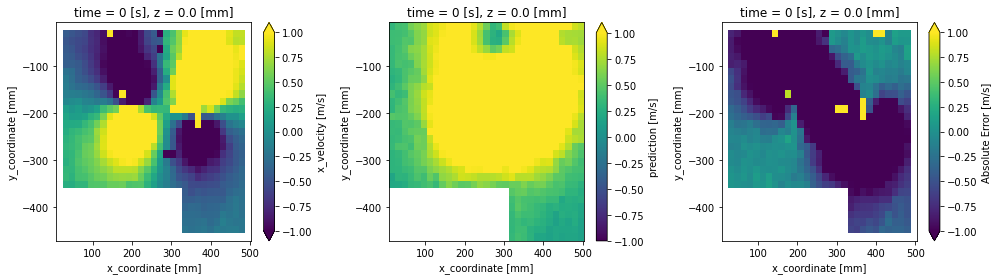

In [13]:
vortex_diff.cmp.plot((14, 4), vmin=-1, vmax=1)

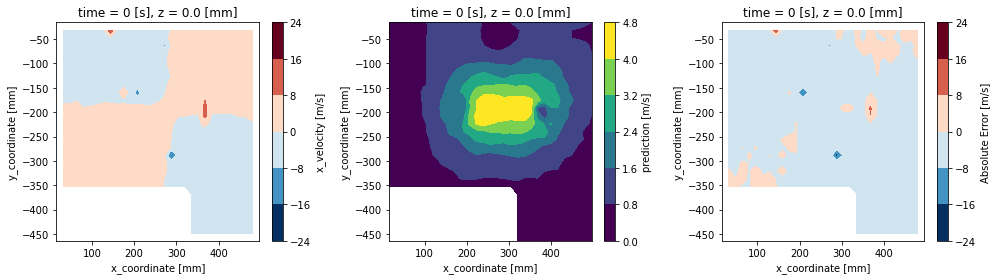

In [14]:
vortex_diff.cmp.contourf((14, 4))

# Comparison Metrics for vector fields

On the `xr.Dataset` call `compute_metric`, provide the other dataset, the metric name and the vector components.

In [15]:
cmp.metrics.metric_dict

{'AE': comparson_metrics.metrics.AE,
 'RI': comparson_metrics.metrics.RI,
 'MAE': comparson_metrics.metrics.MAE}

## Local metric: Relevance Index
A local metric returns a scalar data variable with the same size/shape of common input data.<br>
The relevance index computes the cosine between the vectors. More information is stored in the attributes of the comparison value in the dataset.<br> In the example, the datasets are interpolated onto each other (depending which one has the higher resolution. The higher resolved dataset is interpolated on the coarser)

In [16]:
cmp = ds1.cmp.compute_metric(ds2, 'RI', ('u', 'v'))

In [17]:
cmp

<xarray.Dataset>
Dimensions:        (y: 29, x: 31)
Coordinates:
  * y              (y) float64 -464.0 -448.0 -432.0 -416.0 ... -48.0 -32.0 -16.0
  * x              (x) float64 16.0 32.0 48.0 64.0 ... 448.0 464.0 480.0 496.0
    time           int32 0
    z              float64 0.0
Data variables:
    u_observation  (y, x) float32 nan nan nan nan ... 1.127 1.073 0.8495 0.7958
    v_observation  (y, x) float32 nan nan nan nan ... 0.117 0.07952 0.1089
    u_prediction   (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    v_prediction   (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    RI             (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    interpolation_direction:  prediction onto observation

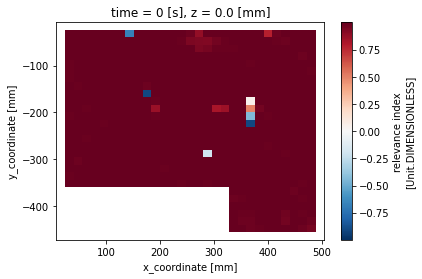

In [18]:
cmp.RI.plot()

## Global metric: MAE
A global metric returns a *single* value for a comparison. In this example, the MAE (Mean average error) is computed

In [19]:
cmp = ds1.u.cmp.compute_metric(ds2.u, 'MAE')

In [20]:
cmp

<xarray.Dataset>
Dimensions:      (y: 29, x: 31)
Coordinates:
  * y            (y) float64 -464.0 -448.0 -432.0 -416.0 ... -48.0 -32.0 -16.0
  * x            (x) float64 16.0 32.0 48.0 64.0 ... 448.0 464.0 480.0 496.0
    time         int32 0
    z            float64 0.0
Data variables:
    observation  (y, x) float32 nan nan nan nan ... 1.127 1.073 0.8495 0.7958
    prediction   (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    MAE          float64 0.2245
Attributes:
    interpolation_direction:  prediction onto observation

In [21]:
cmp.MAE

<xarray.DataArray 'MAE' ()>
array(0.22446241)
Coordinates:
    time     int32 0
    z        float64 0.0
Attributes:
    units:          dimensionless
    lim:            [-inf, inf]
    best:           0
    worst:          (-inf, inf)
    unit:           None
    long_name:      mean absolute error
    bibtex:         ['zhao2019multi', 'wustenhagen2021cfd']
    standard_name:  comparison_value

In [22]:
cmp

<xarray.Dataset>
Dimensions:      (y: 29, x: 31)
Coordinates:
  * y            (y) float64 -464.0 -448.0 -432.0 -416.0 ... -48.0 -32.0 -16.0
  * x            (x) float64 16.0 32.0 48.0 64.0 ... 448.0 464.0 480.0 496.0
    time         int32 0
    z            float64 0.0
Data variables:
    observation  (y, x) float32 nan nan nan nan ... 1.127 1.073 0.8495 0.7958
    prediction   (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    MAE          float64 0.2245
Attributes:
    interpolation_direction:  prediction onto observation

## Getting bibtex of a metric
Each metric has an attribute `bibtex` containing a list of bibtex strings of publications where the metric is mentioned. **Note, that this very likely is not a complete list!** Some trivial metrics may not have a bibtex at all. Please, feel free to add publications where the method is mentioned an is not yet registered in this package.

In [23]:
from comparson_metrics.metrics import RI, ASI

Initialize a comparison method and call `get_bibtex()`. This will return a list of bibtex strings. **Note, that this very likely is not a complete list!**

In [24]:
RI().get_bibtex()

[{'institution': 'SAE Technical Paper',
  'year': '2011',
  'author': 'Liu, Kai and Haworth, Daniel C',
  'title': 'Development and assessment of POD for analysis of turbulent flow in piston engines',
  'ENTRYTYPE': 'techreport',
  'ID': 'liu2011development'},
 {'publisher': 'Springer',
  'year': '2020',
  'pages': '1--16',
  'number': '2',
  'volume': '61',
  'journal': 'Experiments in Fluids',
  'author': 'Willman, Christopher and Scott, Blane and Stone, Richard and Richardson, David',
  'title': 'Quantitative metrics for comparison of in-cylinder velocity fields using particle image velocimetry',
  'ENTRYTYPE': 'article',
  'ID': 'willman2020quantitative'},
 {'publisher': 'Technip',
  'year': '2014',
  'pages': '61--81',
  'number': '1',
  'volume': '69',
  'journal': 'Oil \\& Gas Science and Technology--Revue dâ€™IFP Energies nouvelles',
  'author': 'Kuo, Tang-Wei and Yang, Xiaofeng and Gopalakrishnan, Venkatesh and Chen, Zhaohui',
  'title': 'Large eddy simulation (LES) for IC eng

In [25]:
ASI().get_bibtex()

[{'publisher': 'Wiley Online Library',
  'year': '2012',
  'pages': '214--228',
  'number': '2',
  'volume': '28',
  'journal': 'International journal for numerical methods in biomedical engineering',
  'author': 'Raschi, Marcelo and Mut, Fernando and Byrne, Greg and Putman, Christopher M and Tateshima, Satoshi and Vi{\\~n}uela, Fernando and Tanoue, Tetsuya and Tanishita, Kazuo and Cebral, Juan R',
  'title': 'CFD and PIV analysis of hemodynamics in a growing intracranial aneurysm',
  'ENTRYTYPE': 'article',
  'ID': 'raschi2012cfd'},
 {'publisher': 'Elsevier',
  'year': '2013',
  'pages': '373--382',
  'number': '2',
  'volume': '46',
  'journal': 'Journal of biomechanics',
  'author': "Tang, Elaine and Haggerty, Christopher M and Khiabani, Reza H and de Z{\\'e}licourt, Diane and Kanter, Jessica and Sotiropoulos, Fotis and Fogel, Mark A and Yoganathan, Ajit P",
  'title': 'Numerical and experimental investigation of pulsatile hemodynamics in the total cavopulmonary connection',
  'ENTR